Problem Statement:  To predict the sales of a particular product based on the type of outlet, size of outlet, fat content and year of establishment.

Hypothesis Generation:
 1. Sales of low fat items are higher.
 2. Stores established earlier have comparitively more sales
 3. Supermarket1 type stores have very high percentage of overall sales
 4. Tier 3 stores have higher sales
 5. Item weight, visibility are almost independent variables.
 6. OUT027 have highest sales.

Package Loading

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

Data Loading

In [ ]:
train_data=pd.read_csv("train.csv")
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_data=pd.read_csv("test.csv")
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Data Structure and Contents

In [ ]:
train_data.shape

(8523, 12)

In [ ]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Content of test data

In [ ]:
test_data.shape

(5681, 11)

In [ ]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [ ]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


As the outlet Establishment year is of int type, we should convert it into string type.

In [ ]:
train_data["Outlet_Establishment_Year"]=train_data["Outlet_Establishment_Year"].astype(str)
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
test_data["Outlet_Establishment_Year"]=test_data["Outlet_Establishment_Year"].astype(str)
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [ ]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_data["Item_Fat_Content"]= train_data["Item_Fat_Content"].replace("LF","Low Fat")
train_data["Item_Fat_Content"]= train_data["Item_Fat_Content"].replace("low fat","Low Fat")
train_data["Item_Fat_Content"]= train_data["Item_Fat_Content"].replace("reg","Regular")

Merging duplicates rows of test_data

In [ ]:
test_data["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_data["Item_Fat_Content"]= test_data["Item_Fat_Content"].replace("LF","Low Fat")
test_data["Item_Fat_Content"]= test_data["Item_Fat_Content"].replace("low fat","Low Fat")
test_data["Item_Fat_Content"]= test_data["Item_Fat_Content"].replace("reg","Regular")

In [ ]:
train_data["Item_Fat_Content"].value_counts()
test_data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
#checking out mean of each product typeto see the variations in weight
eps= train_data.groupby("Item_Type")["Item_Weight"].mean()
eps

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

As there is not much variations in the average weight of each product type, we can fill the missing rows by mean value

In [ ]:
twt_mean = train_data["Item_Weight"].mean()
train_data["Item_Weight"]=train_data["Item_Weight"].replace(np.nan, twt_mean)
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
size_out=train_data.set_index("Outlet_Type")
new_train=size_out.loc["Grocery Store",["Outlet_Size","Outlet_Location_Type"]]
new_train["Outlet_Size"].unique()

array(['Small'], dtype=object)

Here,we can see that grocery store only has small and NAN entries in the outlet size column.
So, we can replace missing values of grocery types to small size.


In [ ]:
new_train_1=size_out.loc["Supermarket Type1",["Outlet_Size","Outlet_Location_Type"]]
print(new_train_1)
new_train_2=new_train_1.set_index("Outlet_Location_Type")
print(new_train_2)
nt_2=new_train_2.loc["Tier 2","Outlet_Size"]
nt_2/

                  Outlet_Size Outlet_Location_Type
Outlet_Type                                       
Supermarket Type1      Medium               Tier 1
Supermarket Type1      Medium               Tier 1
Supermarket Type1        High               Tier 3
Supermarket Type1        High               Tier 3
Supermarket Type1       Small               Tier 2
...                       ...                  ...
Supermarket Type1       Small               Tier 1
Supermarket Type1        High               Tier 3
Supermarket Type1       Small               Tier 2
Supermarket Type1       Small               Tier 2
Supermarket Type1       Small               Tier 1

[5577 rows x 2 columns]
                     Outlet_Size
Outlet_Location_Type            
Tier 1                    Medium
Tier 1                    Medium
Tier 3                      High
Tier 3                      High
Tier 2                     Small
...                          ...
Tier 1                     Small
Tier 3         

Outlet_Location_Type
Tier 2    Small
Tier 2    Small
Tier 2    Small
Tier 2    Small
Tier 2    Small
          ...  
Tier 2    Small
Tier 2    Small
Tier 2    Small
Tier 2    Small
Tier 2    Small
Name: Outlet_Size, Length: 2785, dtype: object

From above output we can see that apart from Grocery Store, Supermarket type 1, has a missing outlet size rows.
Also the outlets whose outlet size wasmissing is having tier 2 location, so from this output we can say that the missing size of supermarket type 1 is of small type

In [ ]:
train_data["Outlet_Size"]=train_data["Outlet_Size"].replace(np.nan,"Small")
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Similarly we will replace for the test data

UNIVARIATE ANALYSIS

In [ ]:
tst_mean = train_data["Item_Weight"].mean()
test_data["Item_Weight"]=test_data["Item_Weight"].replace(np.nan, tst_mean)
test_data["Outlet_Size"]=test_data["Outlet_Size"].replace(np.nan,"Small")
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Univariate analysis to see the dependency of each features in Item_Outlet_Sales

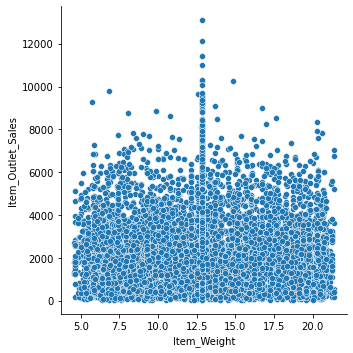

In [ ]:
sns.relplot(x="Item_Weight", y="Item_Outlet_Sales", kind= "scatter", data=train_data)
plt.show()

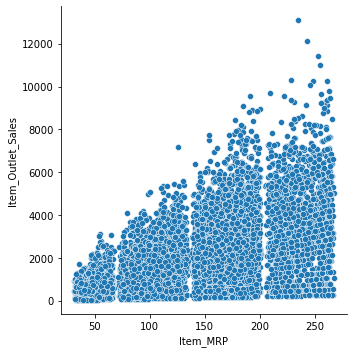

In [ ]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", kind= "scatter", data=train_data)
plt.show()

                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                1.190409e+07
Regular                6.687031e+06


<AxesSubplot:xlabel='Item_Fat_Content'>

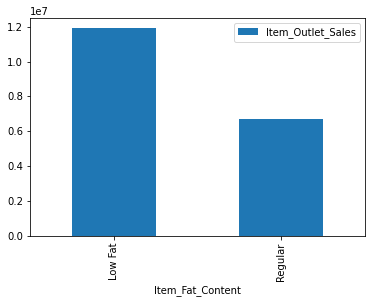

In [ ]:
x_s=train_data.pivot_table(values="Item_Outlet_Sales", index="Item_Fat_Content", aggfunc=np.sum)
print(x_s)
x_s.plot(kind = 'bar')


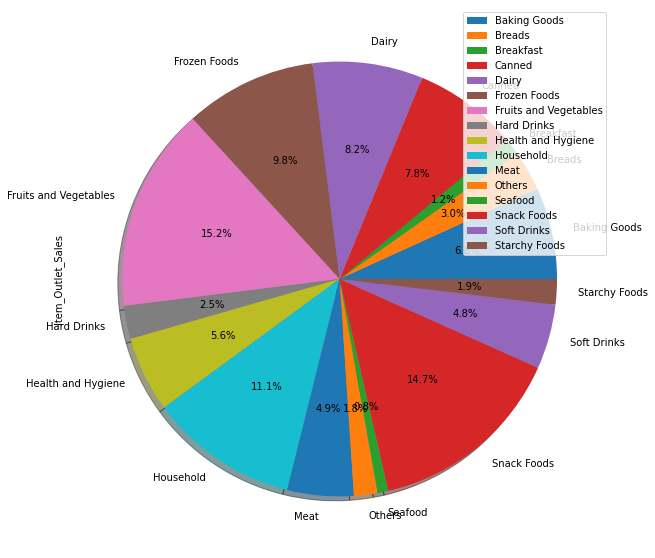

In [ ]:
x1=train_data.pivot_table(values="Item_Outlet_Sales", index="Item_Type", aggfunc=np.sum)
x1.plot(kind = 'pie',y= 'Item_Outlet_Sales',shadow=True,figsize=(20,10), autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.show()

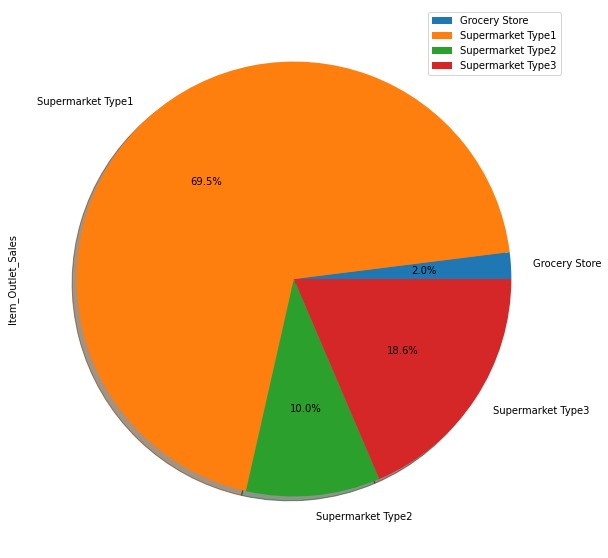

In [ ]:
x2=train_data.pivot_table(values="Item_Outlet_Sales", index="Outlet_Type", aggfunc=np.sum)
x2.plot(kind = 'pie',y= 'Item_Outlet_Sales',shadow=True,figsize=(15,10), autopct='%1.1f%%')
plt.show()


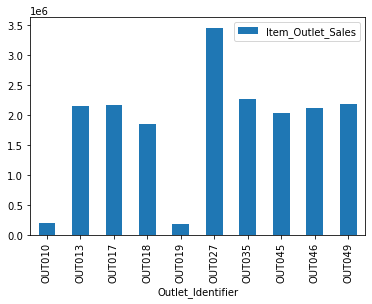

In [ ]:
x3=train_data.pivot_table(values="Item_Outlet_Sales", index="Outlet_Identifier", aggfunc=np.sum)
x3.plot(kind = 'bar')
plt.show()


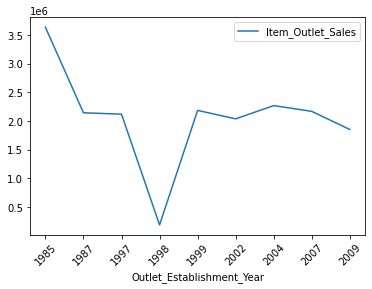

In [ ]:
x4=train_data.pivot_table(values="Item_Outlet_Sales", index="Outlet_Establishment_Year", aggfunc=np.sum)
x4.plot(kind='line', rot = 45)
plt.show()

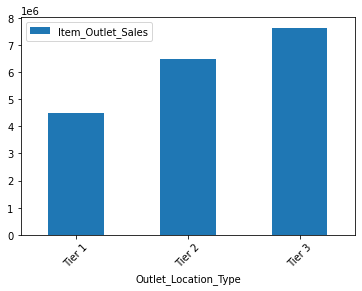

In [ ]:
x5=train_data.pivot_table(values="Item_Outlet_Sales", index="Outlet_Location_Type", aggfunc=np.sum)
x5.plot(kind='bar', rot = 45)
plt.show()

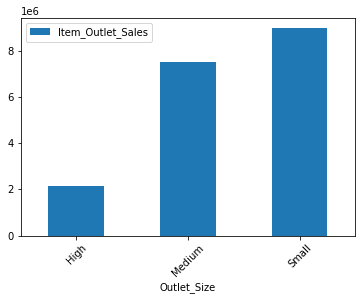

In [ ]:
x5=train_data.pivot_table(values="Item_Outlet_Sales", index="Outlet_Size", aggfunc=np.sum)
x5.plot(kind='bar', rot = 45)
plt.show()

BIVARIATE ANALYSIS

[]

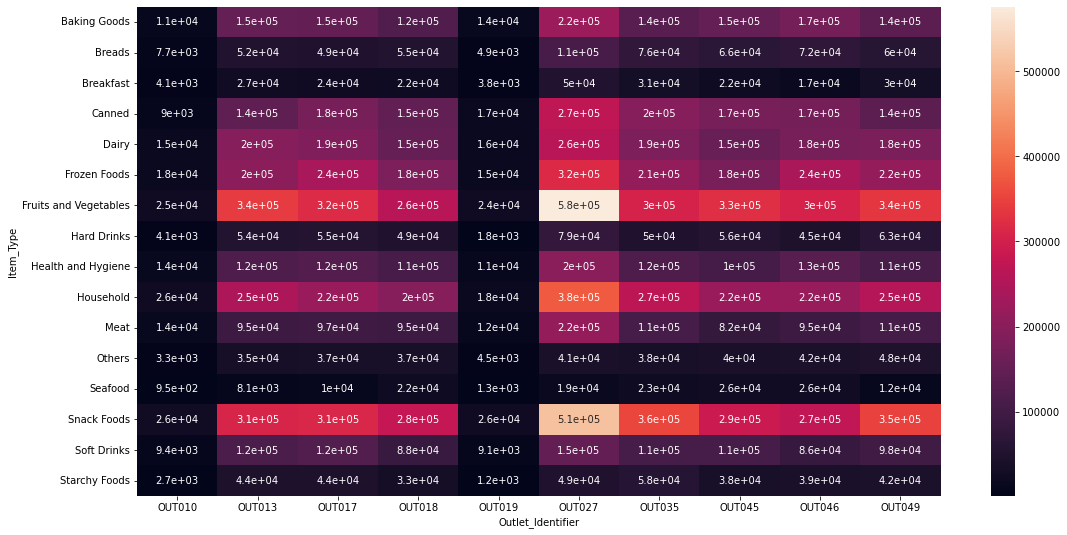

In [ ]:
b1=train_data.pivot_table(values="Item_Outlet_Sales",index="Item_Type", columns="Outlet_Identifier", aggfunc=np.sum)
b1
plt.figure(figsize=(18,9))
sns.heatmap(data=b1,annot=True)
plt.plot()

[]

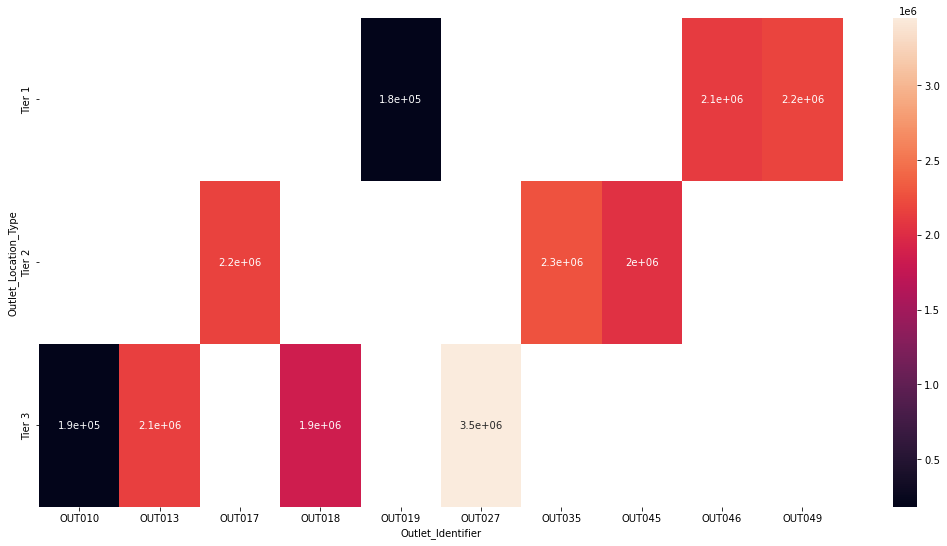

In [ ]:
b2=train_data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Location_Type", columns="Outlet_Identifier", aggfunc=np.sum)
b2
plt.figure(figsize=(18,9))
sns.heatmap(data=b2,annot=True)
plt.plot()

[]

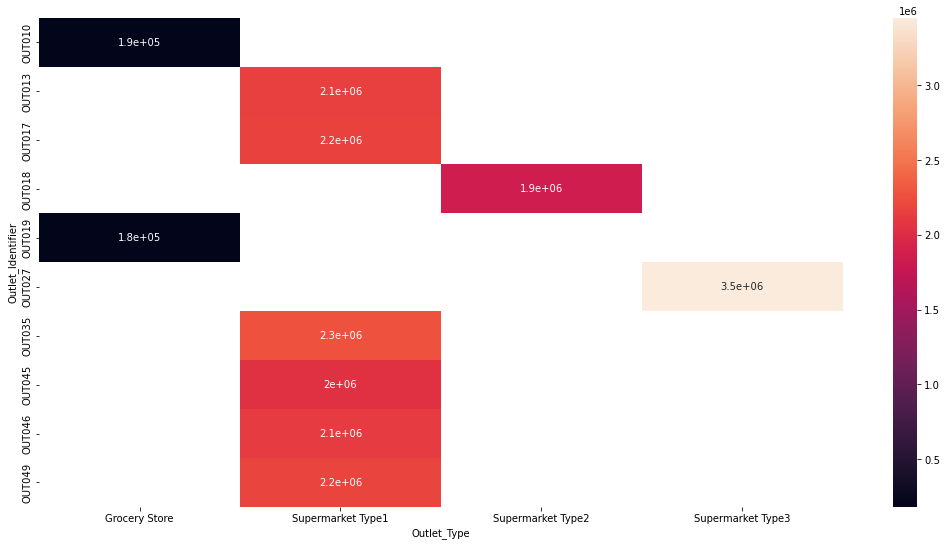

In [ ]:
b3=train_data.pivot_table(values="Item_Outlet_Sales",columns="Outlet_Type", index="Outlet_Identifier", aggfunc=np.sum)
b3
plt.figure(figsize=(18,9))
sns.heatmap(data=b3,annot=True)
plt.plot()

[]

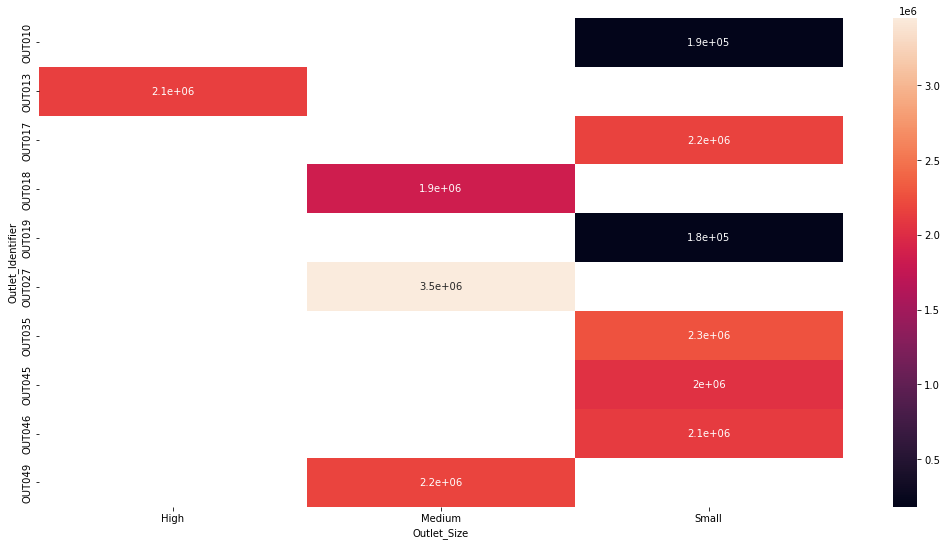

In [ ]:
b4=train_data.pivot_table(values="Item_Outlet_Sales",columns="Outlet_Size", index="Outlet_Identifier", aggfunc=np.sum)
b4
plt.figure(figsize=(18,9))
sns.heatmap(data=b4,annot=True)
plt.plot()

Handling Outliers

<Figure size 1152x576 with 0 Axes>

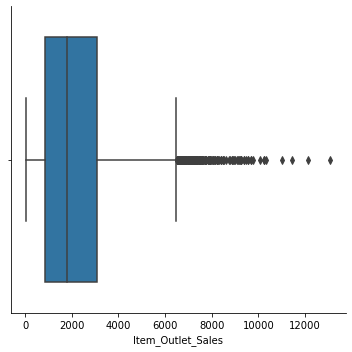

In [ ]:
plt.figure(figsize=[16,8])
sns.catplot(x="Item_Outlet_Sales", data= train_data, kind="box")
plt.show()

<Figure size 1152x576 with 0 Axes>

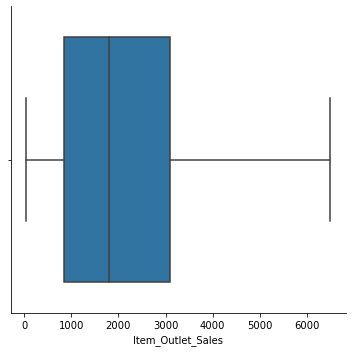

In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR= Q3- Q1
    lower_range = Q1-(1.5*IQR)
    upper_range= Q3 + (1.5*IQR)
    return lower_range,upper_range
low_sales,high_sales= remove_outliers(train_data["Item_Outlet_Sales"])
train_data["Item_Outlet_Sales"]=np.where(train_data["Item_Outlet_Sales"]>high_sales,high_sales,train_data["Item_Outlet_Sales"])
train_data["Item_Outlet_Sales"]=np.where(train_data["Item_Outlet_Sales"]<low_sales,low_sales,train_data["Item_Outlet_Sales"])
plt.figure(figsize=[16,8])
sns.catplot(x="Item_Outlet_Sales", data= train_data, kind="box")
plt.show()

In [ ]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.012370
Item_Visibility,-0.012049,1.000000,-0.001315,-0.131600
Item_MRP,0.024756,-0.001315,1.000000,0.574554
Item_Outlet_Sales,0.012370,-0.131600,0.574554,1.000000


By looking at the univariate analysis, we can say that columns:-"Item_Visibility" and "Item_Weight" has no effect on "Item_Outlet_Sales"
So in model we will only take Item_MRP as a numerical feature.

In [ ]:
# Scaling Item_MRP
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler(copy=True, with_mean=True, with_std=True)
train_data["Item_MRP"]=std_scale.fit_transform(train_data[["Item_MRP"]])
std_scale=StandardScaler(copy=True, with_mean=True, with_std=True)
test_data["Item_MRP"]=std_scale.fit_transform(test_data[["Item_MRP"]])

Spliting of train and test data for train_data dataframe

In [ ]:
features=["Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
y_train=train_data.Item_Outlet_Sales
X_train=train_data[features]
X_test=test_data[features]
X_test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,-0.536555,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,-0.868937,OUT017,Small,Tier 2,Supermarket Type1
2,Low Fat,Others,1.629848,OUT010,Small,Tier 3,Grocery Store
3,Low Fat,Snack Foods,0.226697,OUT017,Small,Tier 2,Supermarket Type1
4,Regular,Dairy,1.508110,OUT027,Medium,Tier 3,Supermarket Type3


Encoding to change categorical features into numerical features

In [ ]:
# Label/Ordinal Encoding
# Label encoding can only be done into columns like "Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"
from sklearn.preprocessing import OrdinalEncoder
object_cols_LE=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
ord_encode=OrdinalEncoder()
lx_train=X_train.copy()
lx_test=X_test.copy()
lx_train[object_cols_LE] = ord_encode.fit_transform(X_train[object_cols_LE])
lx_test[object_cols_LE] = ord_encode.transform(X_test[object_cols_LE])
lx_train.head()


,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.0,Dairy,1.747454,OUT049,1.0,0.0,1.0
1,1.0,Soft Drinks,-1.489023,OUT018,1.0,2.0,2.0
2,0.0,Meat,0.010040,OUT049,1.0,0.0,1.0
3,1.0,Fruits and Vegetables,0.660050,OUT010,2.0,2.0,0.0
4,0.0,Household,-1.399220,OUT013,0.0,2.0,1.0


In [ ]:
OH_col_train=pd.get_dummies(lx_train[["Item_Type","Outlet_Identifier"]])
OH_col_test=pd.get_dummies(lx_test[["Item_Type","Outlet_Identifier"]])
object_col_HE= ["Item_Type","Outlet_Identifier"]
num_X_train = lx_train.drop(object_col_HE,axis=1)
num_X_test = lx_test.drop(object_col_HE,axis=1)

OH_X_train=pd.concat([num_X_train,OH_col_train],axis=1)
OH_X_test=pd.concat([num_X_test,OH_col_test],axis=1)
OH_X_train.head()


,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.0,1.747454,1.0,0.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,-1.489023,1.0,2.0,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.010040,1.0,0.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0.660050,2.0,2.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,-1.399220,0.0,2.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Encoding finished

Modeling with RandomForestRegressor

In [ ]:
model_1=RandomForestRegressor(n_estimators=100, random_state=0)
model_1.fit(OH_X_train, y_train)
pred_1=model_1.predict(OH_X_test)
pred_1

array([1515.853492, 1817.00149 ,  504.050548, ..., 1559.916136,
       3227.89827 , 1360.908516])

model testing for test data

In [ ]:
model_1.score(OH_X_test,pred_1)

1.0

XG Boost Model

In [ ]:
from xgboost import XGBRegressor
model_2= XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=4)
model_2.fit(OH_X_train,y_train,verbose=False)
pred_2=model_2.predict(OH_X_test)
pred_2

array([1717.5659 , 1378.5663 ,  374.95523, ..., 1752.9386 , 3237.5232 ,
       1424.1265 ], dtype=float32)

Linear Regression Model

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_data[['Item_MRP']], train_data.Item_Outlet_Sales)
coe = reg.coef_
intercpt = reg.intercept_
print(coe)
print(intercpt)

[933.516337]
2156.3130158864246


In [ ]:
reg.predict(test_data[['Item_MRP']])

array([1655.42991939, 1345.14620823, 3677.8023073 , ..., 1819.7946133 ,
       3267.98565242, 1231.50259375])

Plotting of linear regression

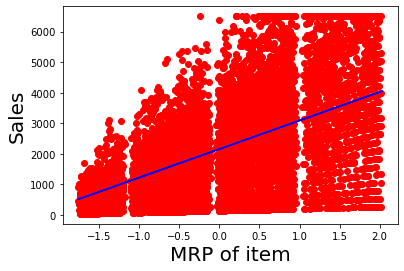

In [ ]:
%matplotlib inline
plt.xlabel('MRP of item', fontsize=20)
plt.ylabel('Sales', fontsize = 20)
plt.scatter(train_data.Item_MRP, train_data.Item_Outlet_Sales,color = 'red')
plt.plot(test_data.Item_MRP, reg.predict(test_data[['Item_MRP']]),color = 'blue')